<a target="_blank" href="https://colab.research.google.com/drive/1pgsMo4c0Iax79YITcj1xiocbarkBhRLu?usp=sharing">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

---
# **Practical Implementation of Optimization Methods** - Part 2

#### Program: `Deep Learning Indabax, Ghana, 2025` .
#### 🏫 Institution: Kumasu Centre for Collaborative Research in Tropical Medicine (KCCR)
#### 📅 Date: `*16 th June, 2025`

---

##### 👨‍🏫 Facilitator: Toufiq Musah       

**Research & Engineering at KCCR**  

✉️ me: [toufiq musah](https://toufiqmusah.github.io/)  
🔗 LinkedIn: [toufiq](https://www.linkedin.com/in/toufiqmusah/)

---
### 🛠️ Tools and  Frameworks used  

- Numpy 1.6.x
- TensorFlow 2.x / Keras
- Matplotlib.pyplot
---

# **Table of Contents**

1.   [Numpy Neural Network](#NumpyNeuralNetwork)
2.   [Activation Functions](#ActivationFunctions)
3.   [Gradient Descent](#GradientDescent)
4.   [Quantization](#Quantization)
5.   [With Tensorflow](#WithTensorflow)

# **Numpy Neural Network**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

# Initialize weights and biases for a simple one-hidden-layer network
# Weights are initialized with small random values to break symmetry

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

# **Activation Functions**

In [23]:
# --- Helper Function - Plot Activations --- #

def plot_activation(activation: callable, title: str):
  X = np.linspace(-5, 5, 100)
  Y = activation(X)

  plt.figure(figsize=(6, 4))
  plt.plot(X, Y)
  plt.title(title)
  plt.xlabel('Input')
  plt.ylabel('Output')
  plt.grid(True)
  plt.show()

In [ ]:
# --- ReLU Activation Function --- #

def relu(x):
    return np.maximum(0, x)

# plotting ReLU
plot_activation(relu, "ReLU Activation Function")

In [ ]:
# --- LeakyReLU Activation Function --- #

def leaky_relu(x):
    return np.maximum(0.1*x, x)

# plotting ReLU
plot_activation(leaky_relu, "ReLU Activation Function")

In [ ]:
# --- Derivative ReLU Activation Function --- #

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

plot_activation(relu_derivative, "Derivative ReLU Activation Function")

In [ ]:
# --- Tanh Activation Function --- #

def tanh(x):
    return np.tanh(x)

#plotting tanh
plot_activation(tanh, "Tanh Activation Function")

In [ ]:
# --- Derivative Tanh Activation Function --- #

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

#plotting tanh
plot_activation(tanh_derivative, "Derivative Tanh Activation Function")

# **Gradient Descent**

In [ ]:
class SGDOptimizer:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.learning_rate * grads[key]

In [ ]:
# To simulate/demonstrate SGD,
# let's define a simple function to minimize -> #MSE

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def mean_squared_error_derivative(y_true, y_pred):
    return -2 * (y_true - y_pred) / len(y_true)

In [ ]:
# Let's simulate optimizing a single parameter 'w'
# to minimize the function (w - 5)^2
# The minimum is at w = 5.

def objective_function(w):
    return (w - 5)**2

def objective_function_derivative(w):
    return 2 * (w - 5)

In [ ]:
# We will initate 'w' at 0.0, and take 50 steps to find the optimal minimum

initial_w = 0.0
params = {'w': initial_w}
num_steps = 50

# initiating the optimizer
optimizer = SGDOptimizer(learning_rate=0.1)

In [ ]:
# Store the history of the parameter value and the objective function value

w_history = [params['w']]
loss_history = [objective_function(params['w'])]

In [ ]:
# Simulate the optimization process
# Calculate the gradient of the objective function with respect to 'w'

for step in range(num_steps):
    grads = {'w': objective_function_derivative(params['w'])}

    # Update the parameter using SGD
    optimizer.update(params, grads)

    # Store the updated parameter and loss
    w_history.append(params['w'])
    loss_history.append(objective_function(params['w']))

In [ ]:
# Plot the history of the parameter value
plt.plot(w_history)
plt.title('SGD Optimization of Parameter w')
plt.xlabel('Optimization Step')
plt.ylabel('Parameter Value (w)')
plt.grid(True)
plt.show()

In [ ]:

# Plot the history of the objective function value (loss)
plt.plot(loss_history)
plt.title('SGD Optimization of Objective Function')
plt.xlabel('Optimization Step')
plt.ylabel('Objective Function Value ((w-5)^2)')
plt.grid(True)
plt.show()

In [ ]:
# Plot of the objective function and the path taken by SGD
w_values = np.linspace(0, 10, 100)
objective_values = objective_function(w_values)

plt.plot(w_values, objective_values, label='Objective Function $(w-5)^2$')
plt.plot(w_history, loss_history, 'ro-', markersize=5, label='SGD Path')
plt.title('SGD Optimization Path on the Objective Function Landscape')
plt.xlabel('Parameter Value (w)')
plt.ylabel('Objective Function Value')
plt.legend()
plt.grid(True)
plt.show()

**It's Not Always Simple, Y'Know?**


<center> 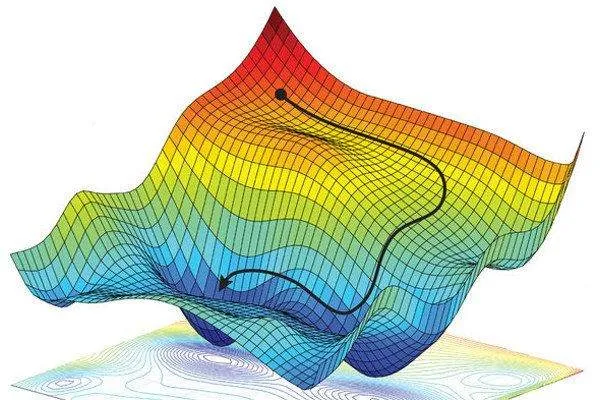

# **Quantization**

<center>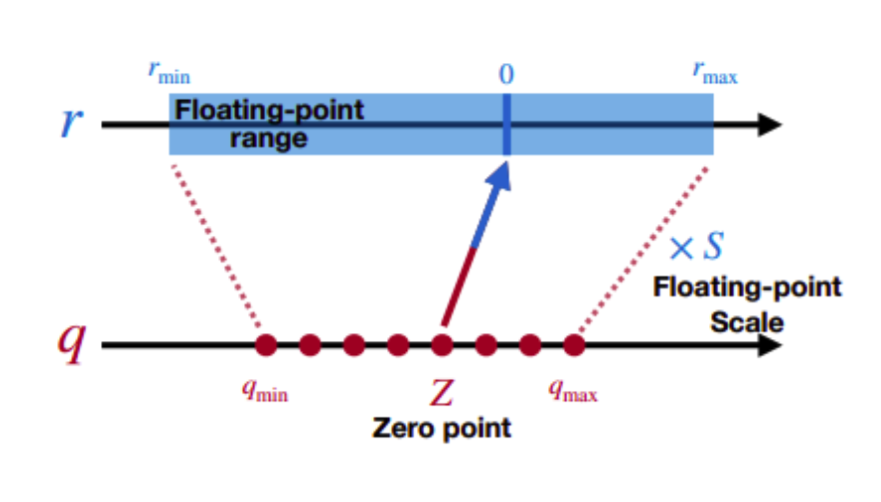

In [ ]:
# Performing 'Simple' Linear Quantization,
# & Dequantization, of course.

def linear_quantize(data_float, num_bits=8):
    # Find the range of the float data
    min_val, max_val = np.min(data_float), np.max(data_float)

    # Calculate the scale factor - S
    scale = (max_val - min_val) / (2**num_bits - 1)

    # zero-point = - min_val / scale
    # Quantize to integer
    data_quantized = np.round((data_float - min_val) / scale).astype(int)

    return data_quantized, scale, min_val

def linear_dequantize(data_quantized, scale, min_val):
    return data_quantized.astype(float) * scale + min_val

In [ ]:
# Example float weights
weights_float = np.random.randn(5) * 5
print("Original Floats:", weights_float)

Original Floats: [-1.01663101 -2.11066912 -8.12907503 -8.2404288  16.03198811]


In [ ]:
quantized_weights, scale, min_val = linear_quantize(weights_float)
print("Quantized Integers (8-bit):", quantized_weights)

In [ ]:
dequantized_weights = linear_dequantize(quantized_weights, scale, min_val)
print("Dequantized Floats:", dequantized_weights)

# **With Tensorflow**

All in 6 lines of code

In [ ]:
import tensorflow as tf

# Define the model architecture
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)), # Hidden layer
    tf.keras.layers.Dense(1) ])

model_tf.compile(optimizer='adam', loss='mean_squared_error')

print("TensorFlow model summary:")
model_tf.summary()